In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
with open('E:/百度/train+cnn.txt', encoding='utf8') as file:
    line_list1 = [k.strip() for k in file.readlines()]
    #读取每行
    train_label_list = [k.split()[0] for k in line_list1]
    #将标签依次取出
    train_content_list = [k.split(maxsplit=1)[1] for k in line_list1]
    #将内容依次取出,此处注意split()选择最大分割次数为1,否则句子被打断.
with open('E:/百度/test+cnn.txt', encoding='utf8') as file:
    line_list2 = [k.strip() for k in file.readlines()]
    test_label_list = [k.split()[0] for k in line_list2]
    test_content_list = [k.split(maxsplit=1)[1] for k in line_list2]
with open('E:/百度/val+cnn.txt', encoding='utf8') as file:
    line_list3 = [k.strip() for k in file.readlines()]
    val_label_list = [k.split()[0] for k in line_list3]
    val_content_list = [k.split(maxsplit=1)[1] for k in line_list3]

In [17]:
len(train_content_list[1])

1466

In [4]:
from keras.utils import plot_model
from keras.layers import Embedding
import gensim
from gensim.models.word2vec import Word2Vec,LineSentence,Text8Corpus

Using TensorFlow backend.
C:\Users\hkdw235\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
model = Word2Vec.load('cont.model')

In [20]:
word_vectors = model.wv

In [22]:
EMBEDDING_DIM = 128 # 词向量空间维度
num_classes=10 # 类型数量
maxlen=600 # 文本长度
max_words=10000 # 词汇表数量

In [23]:
embeddings_index = {}
for word, vocab_obj in model.wv.vocab.items():
    if int(vocab_obj.index) < max_words:
        embeddings_index[word] = word_vectors[word]
del model, word_vectors # 删掉gensim模型释放内存
print('Found %s word vectors.' % len(embeddings_index))

Found 10000 word vectors.


In [24]:
embeddings_index

{'意外': array([ 0.5540286 ,  0.55068445,  0.08427642, -0.23587865,  0.35876414,
        -0.35988653,  0.23073389,  0.3318395 ,  0.22779827, -0.17423019,
         0.3598292 ,  0.14893876,  0.03603127, -0.29179826,  0.10044038,
         0.42303556,  0.1544633 , -0.05152378,  0.31328416, -0.1054863 ,
        -0.36942348, -0.10510012, -0.17592223,  0.13285121, -0.28458512,
        -0.11054362,  0.1385927 ,  0.09835633,  0.29863372, -0.05614101,
        -0.44148663,  0.5472296 ,  0.0789332 , -0.0134193 , -0.25672272,
        -0.3187928 , -0.20705691,  0.42845148,  0.03565305,  0.4678695 ,
         0.18273154,  0.17304729, -0.0773211 , -0.00203539, -0.27060592,
         0.44599706, -0.305559  , -0.03564148, -0.01415596,  0.53017604,
         0.28892526,  0.17757428, -0.40254837, -0.18851773,  0.1641799 ,
         0.02331639,  0.08990168, -0.17593212, -0.07800075, -0.10527475,
         0.26511458, -0.13778166, -0.11166662, -0.27947938, -0.2385318 ,
        -0.10703182, -0.15382732, -0.3494798 

In [25]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [36]:
tokenizer = Tokenizer(num_words=max_words) # 传入我们词向量的字典
content_list=train_content_list+test_content_list+val_content_list
tokenizer.fit_on_texts(content_list) # 传入我们的训练数据，得到训练数据中出现的词的字典
sequences1 = tokenizer.texts_to_sequences(train_content_list) # 根据训练数据中出现的词的字典，将训练数据转换为sequences
sequences2 = tokenizer.texts_to_sequences(test_content_list) # 根据训练数据中出现的词的字典，将训练数据转换为sequences
sequences3 = tokenizer.texts_to_sequences(val_content_list) # 根据训练数据中出现的词的字典，将训练数据转换为sequences
word_index = tokenizer.word_index
print('Found %s unique tokens2.' % len(word_index))


Found 383707 unique tokens2.


In [38]:
sequences2[10]

[89,
 3388,
 1563,
 77,
 729,
 1759,
 2700,
 105,
 39,
 382,
 18,
 14,
 3,
 555,
 8,
 2331,
 14,
 3,
 421,
 8,
 110,
 1,
 1,
 240,
 1563,
 2,
 28,
 3054,
 312,
 1759,
 1117,
 89,
 54,
 890,
 257,
 604,
 2425,
 89,
 434,
 611,
 257,
 28,
 3149,
 13,
 2427,
 4980,
 3054,
 649,
 240,
 3054,
 2,
 240,
 1563,
 1759,
 6014,
 2528,
 48,
 729,
 649,
 3054,
 89,
 1459,
 980,
 343,
 867,
 281,
 777,
 64,
 566,
 446,
 1610,
 777,
 1111,
 873,
 6339,
 6339,
 923,
 1648,
 89,
 6014,
 2,
 2384,
 978,
 161,
 3054,
 3076,
 198,
 1937,
 2579,
 446,
 729,
 1309,
 240,
 3054,
 580,
 727,
 1520,
 243,
 555,
 191,
 1568,
 470,
 1447,
 1992,
 88,
 78,
 3054,
 1997,
 3590,
 28,
 6805,
 3149,
 13,
 2427,
 28,
 14,
 1090,
 3054,
 1563,
 64,
 446,
 729,
 64,
 1323,
 281,
 64,
 352,
 639,
 1568,
 2362,
 130,
 697,
 86,
 383,
 1648,
 1090,
 3054,
 240,
 1595,
 2768,
 446,
 2384,
 46,
 2107,
 1714,
 115,
 240,
 1090,
 3054,
 2622,
 2700,
 446,
 1090,
 3054,
 777,
 1111,
 1459,
 873,
 6411,
 1992,
 1387,
 78,
 2360

In [39]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
train_Y = to_categorical(label.fit_transform(train_label_list),num_classes=num_classes)
test_Y = to_categorical(label.fit_transform(test_label_list),num_classes=num_classes)
val_Y = to_categorical(label.fit_transform(val_label_list),num_classes=num_classes)

In [40]:
train_X = pad_sequences(sequences1,maxlen=maxlen,truncating='post',padding='post') # 和原作者的不同
test_X = pad_sequences(sequences2,maxlen=maxlen,truncating='post',padding='post') # 和原作者不同 
val_X = pad_sequences(sequences3,maxlen=maxlen,truncating='post',padding='post') # 和原作者不同 

In [41]:
train_X[1] 

array([5903,    6, 5493,   17,   87, 3635, 3635, 8070,   13,  656,  776,
       2440,  366, 5486,  369,  369, 6292,    3,   52,    8, 2315,    6,
       5524, 3635, 2525, 3437, 6774, 5291,  691, 1554, 3635, 2613, 3399,
         88,  130, 5729,  202, 1171, 3901, 1160, 2697,    4,    4,   14,
          6, 3635,  330,  130, 5729, 1608, 3901, 1160, 7493, 3635, 4353,
       7276, 1232, 2568, 1608, 4676, 5524,  687, 2620, 3437, 6919,  129,
          2, 8566, 3557, 6585,  393, 4551,   36,  518, 2098,  245, 4202,
          8, 3622,   37, 1704,   28, 4519, 7436,  108,    3,    8, 3635,
        573,  278, 3437, 9831, 1138,   28, 2031, 1766, 1766,  284, 2503,
        774,    2, 1276,  713, 9123,   72, 2483, 1954,  129,   72,  265,
        284, 2960, 1512,  817,   28, 3115, 7436, 2194, 6717,  322, 2534,
        558, 9695,    6, 5524, 1379, 3010, 3997, 3635,  140, 2098, 9695,
        129,    2,   48, 5524, 1464,  460,  380,  369,   12, 6292,    7,
        216, 1872, 5376, 6741,  418, 3635, 7977,   

In [42]:
from keras.models import Sequential 
from keras import layers

In [45]:
embedding_matrix = np.zeros((max_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= max_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # 文本数据中的词在词向量字典中没有，向量为取0；如果有则取词向量中该词的向量
        embedding_matrix[i] = embedding_vector

In [59]:
embedding_matrix[10]

array([ 0.51233208,  0.02763907, -0.37967697,  0.00435071,  0.27383918,
       -0.36871171,  0.33393502,  0.10986907,  0.48661947,  0.15232132,
        0.21303469, -0.25747612, -0.44360286, -0.56720763, -0.14340687,
        0.59981531, -0.11427768, -0.19656764,  0.26964003,  0.09737996,
        0.00754166,  0.23361029, -0.02349692, -0.21513286, -0.20134762,
        0.29293549,  0.4757829 , -0.11847068,  0.14579256,  0.42474055,
        0.09417099,  0.3681916 ,  0.11151589, -0.17935121,  0.51000071,
       -0.04067346, -0.18573509,  0.11456023,  0.25991797,  0.39655617,
       -0.20008311,  0.10415827,  0.74806488,  0.24969107,  0.29546314,
       -0.13331044,  0.2402446 , -0.25350532, -0.01250412,  0.22687773,
       -0.01028124,  0.02152123,  0.09643792, -0.07496014, -0.01828037,
        0.20530553, -0.24957372,  0.28743458,  0.36911663,  0.07102103,
        0.58942515, -0.10929471, -0.10689232, -0.16757013,  0.02388551,
        0.00815205,  0.19354238,  0.46220261,  0.14538147,  0.16

In [46]:
model = Sequential()
# 将预训练好的词向量加载如embedding layer
# 我们设置 trainable = False，代表词向量不作为参数进行更新
embedding_layer = model.add(layers.Embedding(max_words,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=maxlen,
                            trainable=False))
con=model.add(layers.Conv1D(filters=256,kernel_size=8))
maxpool=model.add(layers.MaxPooling1D(593))
flatten=model.add(layers.Flatten())
dense1=model.add(layers.Dense(128, input_dim=100))  # 64是输出层的维度
dropout=model.add(layers.Dropout(0.2))  # 控制需要断开的神经元比例，此处应该为0.2
active1=model.add(layers.core.Activation('relu'))
dense2=model.add(layers.Dense(10, input_shape=(600,128)))
predict_y=model.add(layers.core.Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 600, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 593, 256)          262400    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 256)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
__________

In [47]:
from keras import optimizers
optimizer = optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['categorical_accuracy'] )

In [61]:
import random
for i in range(5000):
    train_index = random.sample(list(range(len(train_Y))),k=64)
    X = train_X[train_index]
    Y = train_Y[train_index]
    model.fit(X,Y,verbose=0)
    step = i + 1 
    if step % 100 == 0:
        val_index = random.sample(list(range(len(val_Y))), k=100)
        x = val_X[val_index]
        y = val_Y[val_index]
        loss_value, accuracy_value = model.evaluate(x,y,verbose=0)
        print('step:%d loss:%.4f accuracy:%.4f' %(step, loss_value, accuracy_value))

step:100 loss:0.1142 accuracy:0.9700
step:200 loss:0.1956 accuracy:0.9400
step:300 loss:0.0172 accuracy:1.0000
step:400 loss:0.0271 accuracy:0.9800
step:500 loss:0.1935 accuracy:0.9400
step:600 loss:0.2327 accuracy:0.9200
step:700 loss:0.2027 accuracy:0.9200
step:800 loss:0.1724 accuracy:0.9700
step:900 loss:0.1754 accuracy:0.9600
step:1000 loss:0.1154 accuracy:0.9500
step:1100 loss:0.0841 accuracy:0.9800
step:1200 loss:0.1350 accuracy:0.9800
step:1300 loss:0.1675 accuracy:0.9500
step:1400 loss:0.0212 accuracy:0.9900
step:1500 loss:0.3814 accuracy:0.9100
step:1600 loss:0.1198 accuracy:0.9600
step:1700 loss:0.2957 accuracy:0.9200
step:1800 loss:0.1265 accuracy:0.9500
step:1900 loss:0.1904 accuracy:0.9600
step:2000 loss:0.0565 accuracy:0.9600
step:2100 loss:0.2225 accuracy:0.9600
step:2200 loss:0.2832 accuracy:0.9400
step:2300 loss:0.2715 accuracy:0.9700
step:2400 loss:0.2468 accuracy:0.9600
step:2500 loss:0.0501 accuracy:0.9900
step:2600 loss:0.0628 accuracy:0.9700
step:2700 loss:0.0945

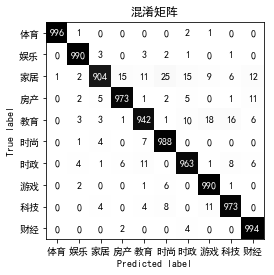

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import mglearn
import matplotlib.pyplot as plt
def predictAll(test_X, batch_size=100):
    predict_value_list = []
    for i in range(0, len(test_X), batch_size):
        X = test_X[i: i + batch_size]
        predict_value = model.predict(X)
        predict_value_list.extend(predict_value)
    return np.array(predict_value_list)

Y = predictAll(test_X)
y = np.argmax(Y, axis=1)
predict_label_list = label.inverse_transform(y)
score_image = mglearn.tools.heatmap(confusion_matrix(test_label_list, predict_label_list),
                                    xlabel='Predicted label',ylabel='True label',xticklabels=label.classes_,
                                    yticklabels=label.classes_,cmap=plt.cm.gray_r,fmt='%d')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('混淆矩阵')
plt.gca().invert_yaxis()

In [65]:
from sklearn.metrics import precision_recall_fscore_support

def eval_model(y_true, y_pred, labels):
    # 计算每个分类的Precision, Recall, f1, support
    p, r, f1, s = precision_recall_fscore_support(y_true, y_pred)
    # 计算总体的平均Precision, Recall, f1, support
    tot_p = np.average(p, weights=s)
    tot_r = np.average(r, weights=s)
    tot_f1 = np.average(f1, weights=s)
    tot_s = np.sum(s)
    res1 = pd.DataFrame({
        u'Label': labels,
        u'Precision': p,
        u'Recall': r,
        u'F1': f1,
        u'Support': s
    })
    res2 = pd.DataFrame({
        u'Label': ['总体'],
        u'Precision': [tot_p],
        u'Recall': [tot_r],
        u'F1': [tot_f1],
        u'Support': [tot_s]
    })
    res2.index = [999]
    res = pd.concat([res1, res2])
    return res[['Label', 'Precision', 'Recall', 'F1', 'Support']]

eval_model(test_label_list, predict_label_list, label.classes_)

,Label,Precision,Recall,F1,Support
0,体育,0.998997,0.9960,0.997496,1000
1,娱乐,0.985075,0.9900,0.987531,1000
2,家居,0.978355,0.9040,0.939709,1000
3,房产,0.975928,0.9730,0.974462,1000
4,教育,0.961224,0.9420,0.951515,1000
5,时尚,0.957364,0.9880,0.972441,1000
6,时政,0.963000,0.9630,0.963000,1000
7,游戏,0.961165,0.9900,0.975369,1000
8,科技,0.967197,0.9730,0.970090,1000
9,财经,0.965986,0.9940,0.979793,1000
